In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp, date_range
import numpy as np

In [22]:
bitcoin=pd.read_csv('D:\\python\\Titanic_ML\\bitcoin\\bitcoin.csv', date_parser=["Timestamp"])

In [23]:
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1499155260,296127,296558,296016,296540,1.158600,3.432441e+05,296257.67168
1,1499155320,296539,296769,296060,296679,11.115510,3.295332e+06,296462.51372
2,1499155380,296060,296090,296060,296060,5.527494,1.636491e+06,296063.83615
3,1499155440,296060,296260,296015,296015,8.414064,2.491620e+06,296125.66780
4,1499155500,296361,296540,296155,296155,3.993010,1.183292e+06,296340.78573


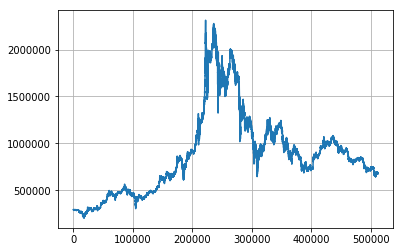

In [24]:
bitcoin['Open'].plot(grid=True)

In [40]:
time=bitcoin['Timestamp']
open=bitcoin['Open']
close=bitcoin['Close']

bitcoin1=bitcoin[['Timestamp', 'Open', 'Close']]
bitcoin2=bitcoin1.set_index('Timestamp')
bitcoin2.sort_index(inplace=True)

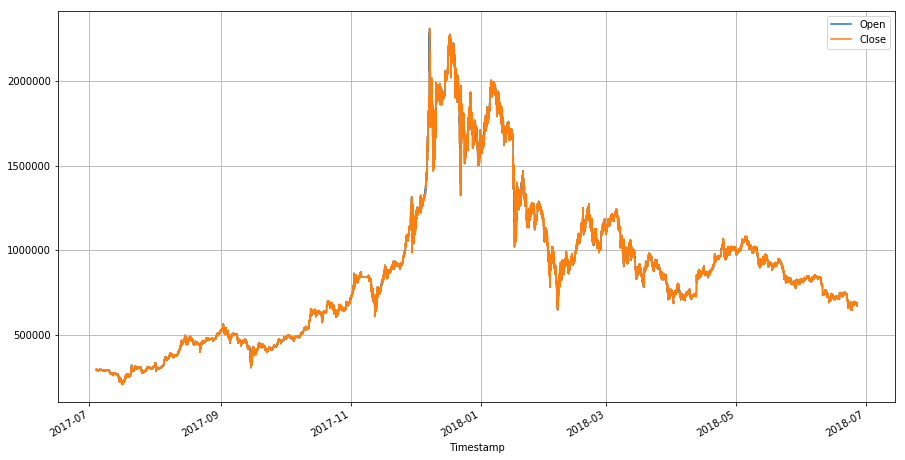

In [43]:
plt.figure(figsize=(15,8))
bitcoin2['Open'].plot(grid=True, fontsize=10)
bitcoin2['Close'].plot(grid=True)
plt.legend()
plt.show()

In [30]:
bitcoin['Timestamp'].head()

0    1499155260
1    1499155320
2    1499155380
3    1499155440
4    1499155500
Name: Timestamp, dtype: int64

In [32]:
type(bitcoin.Timestamp[0])

numpy.int64

In [33]:
bitcoin['Timestamp']=pd.to_datetime(bitcoin['Timestamp'], unit='s')

In [36]:
bitcoin.Timestamp.head(10)

0   2017-07-04 08:01:00
1   2017-07-04 08:02:00
2   2017-07-04 08:03:00
3   2017-07-04 08:04:00
4   2017-07-04 08:05:00
5   2017-07-04 08:06:00
6   2017-07-04 08:07:00
7   2017-07-04 08:08:00
8   2017-07-04 08:09:00
9   2017-07-04 08:10:00
Name: Timestamp, dtype: datetime64[ns]

In [44]:
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-07-04 08:01:00,296127,296558,296016,296540,1.158600,3.432441e+05,296257.67168
1,2017-07-04 08:02:00,296539,296769,296060,296679,11.115510,3.295332e+06,296462.51372
2,2017-07-04 08:03:00,296060,296090,296060,296060,5.527494,1.636491e+06,296063.83615
3,2017-07-04 08:04:00,296060,296260,296015,296015,8.414064,2.491620e+06,296125.66780
4,2017-07-04 08:05:00,296361,296540,296155,296155,3.993010,1.183292e+06,296340.78573


In [45]:
low=bitcoin['Low']
high=bitcoin['High']
date=bitcoin['Timestamp']
bitco1=bitcoin[['Timestamp', 'High', 'Low']]
bitco2=bitco1.set_index('Timestamp')
bitcoin2.sort_index(inplace=True)

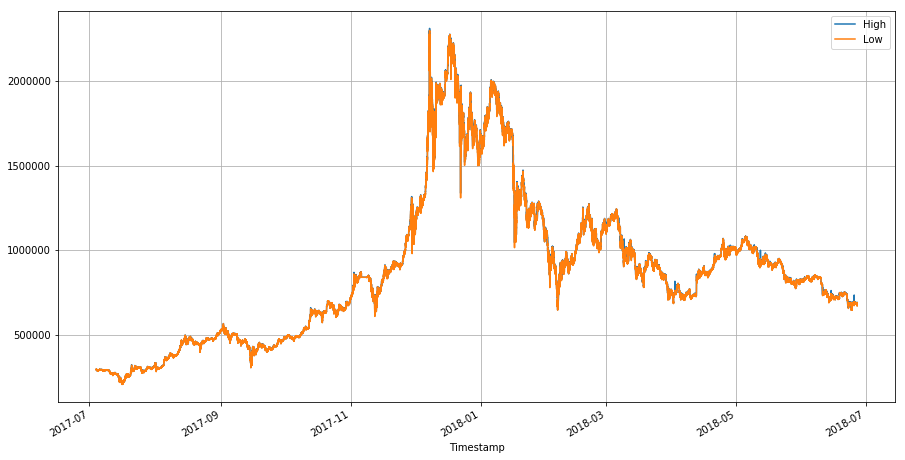

In [48]:
plt.figure(figsize=(15,8))
bitco2['High'].plot(grid=True)
bitco2['Low'].plot(grid=True)
plt.legend()
plt.show()

In [53]:
Weighted_Price=bitcoin['Weighted_Price']
date=bitcoin['Timestamp']
bitco1=bitcoin[['Timestamp', 'Weighted_Price']]
bitco2=bitco1.set_index('Timestamp')
bitco2.sort_index(inplace=True)

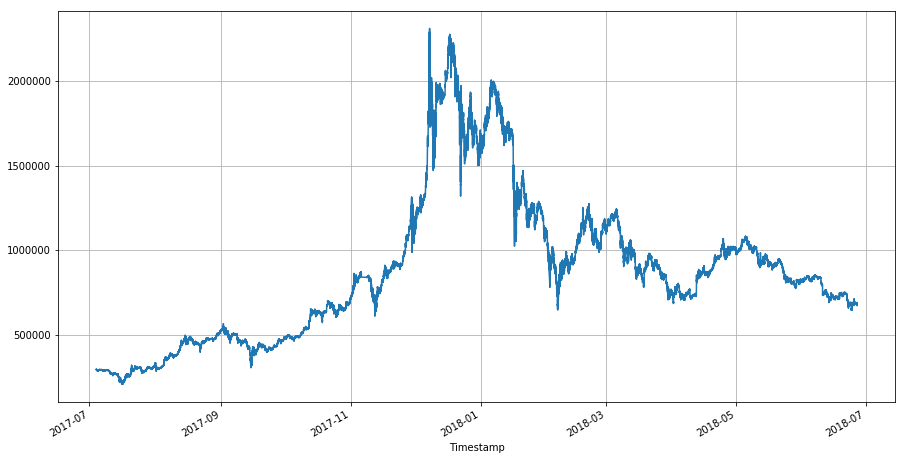

In [54]:
plt.figure(figsize=(15,8))
bitco2['Weighted_Price'].plot(grid=True)
plt.show()


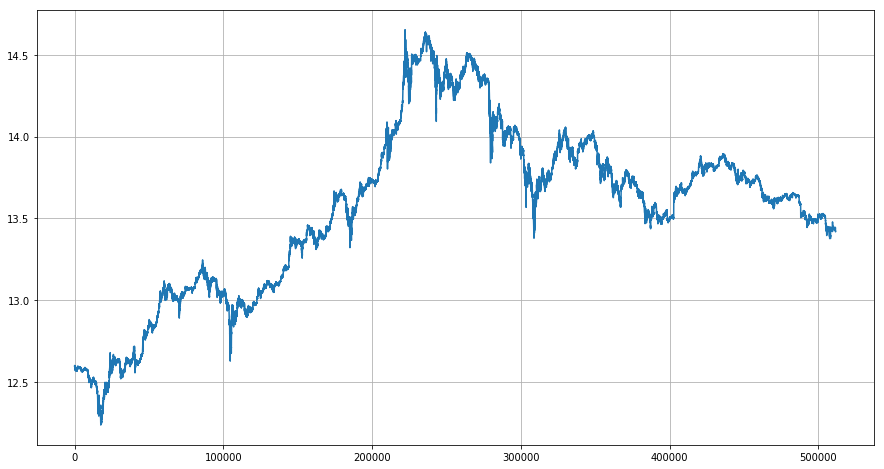

In [72]:
plt.figure(figsize=(15,8))
#x=bitcoin.drop(bitcoin.Timestamp, inplace=True)
log=np.log(Weighted_Price)
log.plot(grid=True)

NameError: name 'plot' is not defined

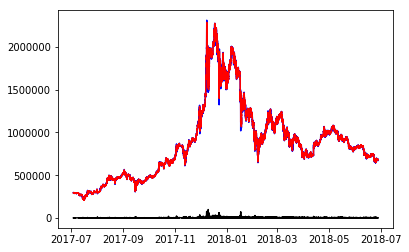

In [76]:
from statsmodels.tsa.stattools import  adfuller

def test_stationary(x):
    rolmean=x.rolling(window=22, center=False).mean()
    
    rolstd=x.rolling(window=12, center=False).std()
    
    orig=plt.plot(x, color='blue', label='original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    result=adfuller(x)
    print('ADE statistic : %f' %result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
            
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts=bitcoin2['Open']
test_stationary(ts)


    
    